# Graphnet-Automata Model Revision, #3.1

## First we import the necessary libraries

In [44]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community
import scipy.ndimage as nd

import collections

In [45]:
import warnings; warnings.simplefilter('ignore')

## A kernel has been introduced to facilitate the search for new graphs

In [46]:
KERNEL = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0]], dtype=np.uint8)

In [37]:
# convolution code courtesy of salt-die
class generator_state:
    seed = nx.to_numpy_matrix(nx.erdos_renyi_graph(13, 0.05, seed = 1, directed=True))
    
    def next_state(self):
        seed = self.seed
        seed = np.pad(seed, (1, 1), 'constant')
        neighbor_count = nd.convolve(seed, KERNEL, mode="constant")
        self.seed = np.where(((seed == 0) & (neighbor_count > 0) & (neighbor_count <= 4)) |
                                 ((seed == 1) & (neighbor_count > 4)), 1, 0)
        return(self.seed)
    
    def run(self):
        while True:
            for _ in range(500):
                self.next_state()
            return(self.seed)

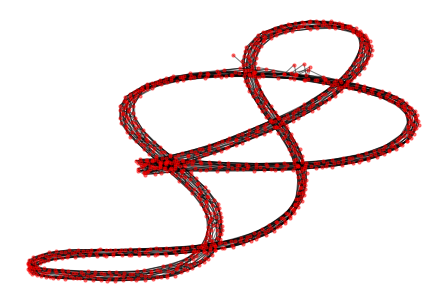

In [38]:
gen = generator_state()
gen_g1 = nx.from_numpy_matrix(gen.run())
nx.draw(gen_g1, node_size=10, alpha=0.5)
plt.savefig('g3.1_500.png')
plt.show()

## To quantify this graph structure, the distribution of the geodesic length is shown.

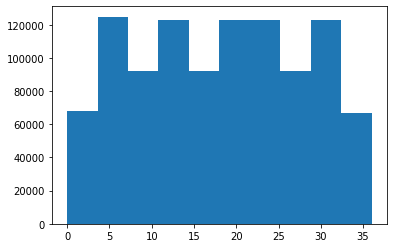

In [39]:
length_gen_g1 = dict(nx.all_pairs_shortest_path_length(gen_g1))
path_gen_g1 = dict(nx.all_pairs_shortest_path(gen_g1))
len_gen_g1 = []
for node1 in length_gen_g1:
    for node2 in length_gen_g1[node1]:
        len_gen_g1.append(length_gen_g1[node1][node2])
plt.hist(len_gen_g1)
plt.show()

## To further quantify this graph structure, the diameter of the graph is calculated.  Larger (>7) diameters tend to lead to more interesting graphs.

In [40]:
nx.algorithms.distance_measures.diameter(gen_g1)

36

## 36 is quite large.

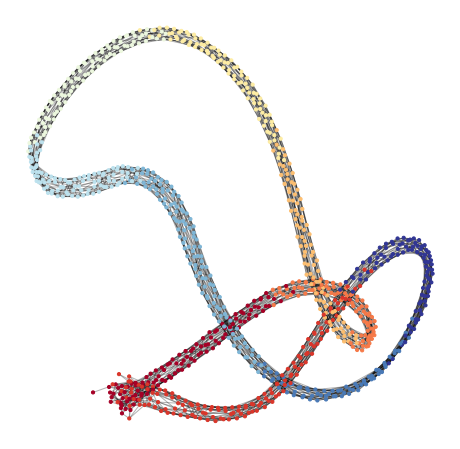

In [41]:
partition = community.best_partition(gen_g1)
pos = nx.spring_layout(gen_g1)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(gen_g1, pos, node_size=10, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(gen_g1, pos, alpha=0.3)
plt.savefig('g3.1_500_community.png')
plt.show(gen_g1)

## Most of the nodes having the same degree seems to be a clear indication of ordered graphs.

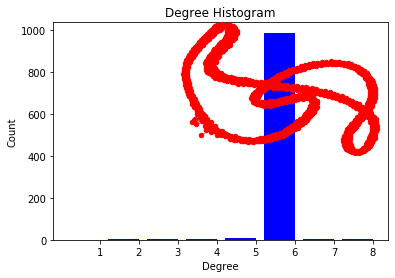

In [49]:
# from https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
degree_sequence = sorted([d for n, d in gen_g1.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = gen_g1.subgraph(sorted(nx.connected_components(gen_g1), key=len, reverse=True)[0])
pos = nx.spring_layout(gen_g1)
plt.axis('off')
nx.draw_networkx_nodes(gen_g1, pos, node_size=20)
nx.draw_networkx_edges(gen_g1, pos, alpha=0.4)

plt.savefig('g3.1_500_degree_hist.png')
plt.show()

### Same as above, but with fewer runs, to view the Möbius strip-like structure better.

In [42]:
# convolution code courtesy of salt-die
class generator_state_2:
    seed = nx.to_numpy_matrix(nx.erdos_renyi_graph(13, 0.05, seed = 1, directed=True))
    
    def next_state(self):
        seed = self.seed
        seed = np.pad(seed, (1, 1), 'constant')
        neighbor_count = nd.convolve(seed, KERNEL, mode="constant")
        self.seed = np.where(((seed == 0) & (neighbor_count > 0) & (neighbor_count <= 4)) |
                                 ((seed == 1) & (neighbor_count > 4)), 1, 0)
        return(self.seed)
    
    def run(self):
        while True:
            for _ in range(300):
                self.next_state()
            return(self.seed)

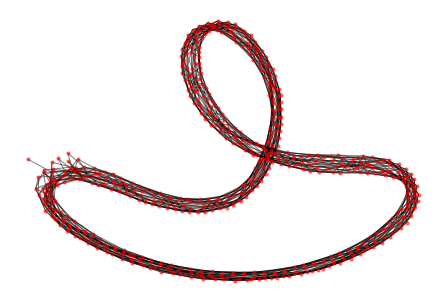

In [32]:
gen_2 = generator_state_2()
gen_g1_2 = nx.from_numpy_matrix(gen_2.run())
nx.draw(gen_g1_2, node_size=10, alpha=0.5)
plt.savefig('g3.1_300.png')
plt.show()

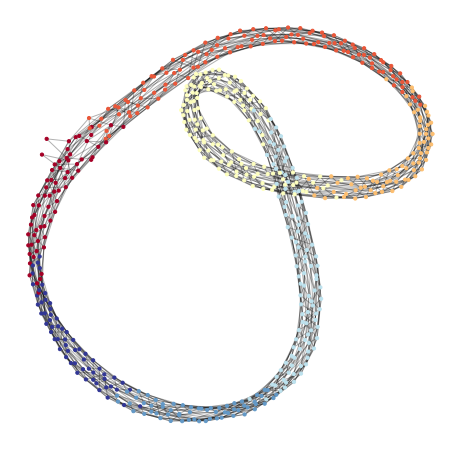

In [35]:
partition = community.best_partition(gen_g1_2)
pos = nx.spring_layout(gen_g1_2)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(gen_g1_2, pos, node_size=10, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(gen_g1_2, pos, alpha=0.3)
plt.savefig('g3.1_300_community.png')
plt.show(gen_g1_2)